## JOB ROLE PREDICTION USING RESUME

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings("ignore")
import joblib

In [3]:
## loading the data
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Data Understanding

In [5]:
df.shape

(962, 2)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [7]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [8]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

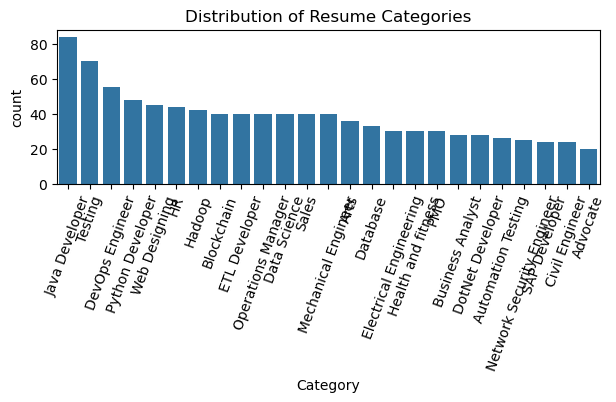

In [9]:
# Check category distribution
plt.figure(figsize=(7,2))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=70)
plt.title("Distribution of Resume Categories")
plt.show()

In [10]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', str(text))  
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

In [12]:

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df['cleaned_resume']

0      skills programming languages python pandas num...
1      education details may may uitrgpv data scienti...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge mspower poi...
961    skill set os windows xp database mysql sql ser...
Name: cleaned_resume, Length: 962, dtype: object

### Data Balancing

In [14]:
# making the categories equall
max_size = df['Category'].value_counts().max()
print("The resume that is having highest frequency = ",max_size)
print("="*50)
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
df = balanced_df.sample(frac=1).reset_index(drop=True)
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts(), end=" ")

The resume that is having highest frequency =  84

Balanced Category Distribution (After Oversampling):
Category
Civil Engineer               84
PMO                          84
SAP Developer                84
Hadoop                       84
Mechanical Engineer          84
DevOps Engineer              84
Sales                        84
Advocate                     84
Database                     84
Blockchain                   84
Web Designing                84
Electrical Engineering       84
Network Security Engineer    84
HR                           84
Data Science                 84
Testing                      84
DotNet Developer             84
Python Developer             84
Arts                         84
Operations Manager           84
Automation Testing           84
Health and fitness           84
Business Analyst             84
ETL Developer                84
Java Developer               84
Name: count, dtype: int64 

In [15]:
balanced_df

,Category,Resume,cleaned_resume
0,Advocate,SKILLS â¢ Knows English as native speaker (IE...,skills knows english native speaker ielts over...
1,Advocate,"Education Details \r\n B.Com, LL.B., Univers...",education details bcom llb university clacutta...
2,Advocate,"TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. Off...",technical qualifications windows ms officeeduc...
3,Advocate,â¢ Hard working â¢ Quick learnerEducation De...,hard working quick learnereducation details ju...
4,Advocate,â¢ Hard working â¢ Quick learnerEducation De...,hard working quick learnereducation details ju...
...,...,...,...
2095,Web Designing,"Technical Skills Web Technologies: Angular JS,...",technical skills web technologies angular js h...
2096,Web Designing,"Technical Skills Web Technologies: Angular JS,...",technical skills web technologies angular js h...
2097,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,education details bca bachelor computer applic...
2098,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W...",skills languages c basic java basic web techno...


In [16]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_resume']).toarray()
y = df['Category']

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y

0               Civil Engineer
1                           HR
2                ETL Developer
3             Business Analyst
4           Health and fitness
                 ...          
2095    Electrical Engineering
2096                  Advocate
2097       Mechanical Engineer
2098        Health and fitness
2099                     Sales
Name: Category, Length: 2100, dtype: object

In [30]:
df["cleaned_resume"][0]

'computer skills holder valid ksa license basic computer ms office autocad education details january diploma bengaluru karnataka oxford polytechnic banglore civil engineer civil engineer utility powertech ltd skill details company details company utility powertech ltd description project name nabinagar thermal power project aurangabad bihar client ntpcbrbcl position civil engineer company dammam ksa description october june al nafjan al abad co dammam ksa position civil engineer project undertaken project name stc qatif sl project client department civil aviation main contractor al nafjan al abad co consultant arif kinfolk project name king fahad international airport client department civil aviation main contractor al nafjan al abad co consultant daralhadassah project description dpf eleven buildings building building buildings typical three type type type type basically building senior staff saudi arabian police force army accommodation saudi arabia job responsibility planning projec

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=13)

In [39]:
y_train

518           Business Analyst
316     Electrical Engineering
822                 Blockchain
16          Health and fitness
717              Web Designing
                 ...          
153               Data Science
1780            Java Developer
866                   Advocate
74            Python Developer
338                 Blockchain
Name: Category, Length: 1680, dtype: object

In [41]:
X_train = pd.DataFrame(X_train, columns=vectorizer.get_feature_names_out())
X_train = pd.DataFrame(X_train)
X_train

,aaa,ab,abacus,abad,abap,abb,abilities,ability,able,abridged,...,york,young,youth,yrs,zaggle,zensar,zero,zhypility,zone,zz
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.044033,0.0,0.046894,0.031974,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.074975,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.044422,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
train_df = X_train.copy()
train_df['Category'] = y_train.reset_index(drop=True)

### hyperparameter grids

In [46]:
param_grids = {
        "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for euclidean distance
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

In [48]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

best_params = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X,y)
    best_params[name] = grid_search.best_params_

print("\nBest Hyperparameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Hyperparameters for Each Model:
Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Decision Tree: {'max_depth': 20, 'min_samples_split': 2}


## Logistic Reg

In [74]:
log=LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [75]:
y_pred=log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### RandomForestClassifier

In [79]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=10, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150,
                       random_state=42)

In [80]:
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## KNN

In [84]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

In [86]:
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## SVM

In [89]:
svm = SVC(C=1, kernel='linear', gamma='scale', random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [90]:
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## DecisionTreeClassifier

In [94]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [95]:
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8523809523809524


In [99]:
# Save Best Model
joblib.dump(rf, 'best_model.pkl')


['best_model.pkl']

In [101]:
# Save vectorizer to a file
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

## CONCLUSION

#### By inspection of all the ML models RandomForestClassifier, SVM, KNN is giving more accuracy there for building model using SVM

In [106]:
def pred(input_resume):
    cleaned_text = clean_text(input_resume) 
    vectorized_text = vectorizer.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = svm.predict(vectorized_text)
    predicted_category_name = predicted_category

    return predicted_category_name[0]  # Return the category name


In [108]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)


'Advocate'

In [110]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)


'Network Security Engineer'